In [1]:
#Importing the necessary modules for the analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objs as go

https://www.kaggle.com/code/cstein06/tutorial-to-the-g-research-crypto-competition/notebook

## Loading the data into the pandas dataframe

In [2]:
#reading the data 
dataset = pd.read_csv('ethereum.csv', index_col=False, sep=",")
dataset.head()

,timestamp,Asset_ID,Count,Open,High,Low,Close,Volume,VWAP,Target
0,1514764860,6,173.0,738.3025,746.00,732.51,738.5075,335.987856,738.839291,-0.004809
1,1514764920,6,192.0,738.5075,745.14,732.49,738.2600,232.793141,738.268967,-0.004441
2,1514764980,6,120.0,738.3325,745.12,730.00,737.5025,174.138031,737.994457,-0.004206
3,1514765040,6,156.0,737.2225,744.69,728.93,737.1025,165.383926,737.303631,-0.002205
4,1514765100,6,118.0,736.5300,743.80,727.11,735.7050,193.078039,736.163026,-0.001744


In [3]:
dataset.tail() #printing the last 5 values in the dataset

,timestamp,Asset_ID,Count,Open,High,Low,Close,Volume,VWAP,Target
1956195,1632182160,6,2162.0,2973.728686,2976.10,2962.09,2964.711429,751.256906,2968.339295,NaN
1956196,1632182220,6,1976.0,2965.461446,2967.95,2958.05,2960.845714,729.113672,2963.499199,NaN
1956197,1632182280,6,2262.0,2960.321429,2962.60,2954.14,2957.398571,807.935362,2958.464868,NaN
1956198,1632182340,6,3594.0,2958.771429,2978.71,2956.75,2977.190000,1723.473979,2970.867698,NaN
1956199,1632182400,6,2205.0,2976.858333,2978.82,2969.35,2972.603333,1204.825710,2975.213919,NaN


In [4]:
#the shape of the dataset
dataset.shape

(1956200, 10)

In [5]:
missing_data = dataset.isnull().sum().to_frame()

# Rename column holding the sums
missing_data = missing_data.rename(columns={0:'Empty Cells'})

# Print the results
print(missing_data)

           Empty Cells
timestamp            0
Asset_ID             0
Count                0
Open                 0
High                 0
Low                  0
Close                0
Volume               0
VWAP                 0
Target             340


In [6]:
eth = dataset.set_index("timestamp")
eth.info(show_counts =True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1956200 entries, 1514764860 to 1632182400
Data columns (total 9 columns):
 #   Column    Non-Null Count    Dtype  
---  ------    --------------    -----  
 0   Asset_ID  1956200 non-null  int64  
 1   Count     1956200 non-null  float64
 2   Open      1956200 non-null  float64
 3   High      1956200 non-null  float64
 4   Low       1956200 non-null  float64
 5   Close     1956200 non-null  float64
 6   Volume    1956200 non-null  float64
 7   VWAP      1956200 non-null  float64
 8   Target    1955860 non-null  float64
dtypes: float64(8), int64(1)
memory usage: 149.2 MB


In [7]:
# Range from which dataset was collected

beg_eth = eth.index[0].astype('datetime64[s]')
end_eth = eth.index[-1].astype('datetime64[s]')

print('Ethereum data goes from ', beg_eth, 'to ', end_eth)

Ethereum data goes from  2018-01-01T00:01:00 to  2021-09-21T00:00:00


In [8]:
# It's mentioned in this dataset that few of the data was missing for certain timeframe.
# each row contains values corresponds to observations that was obtained in 1 minute.

(eth.index[1:]-eth.index[:-1]).value_counts()

60      1956043
120         100
180          23
300           5
540           4
240           3
360           2
480           2
600           2
2220          1
420           1
780           1
900           1
1380          1
2580          1
1320          1
1980          1
1020          1
1860          1
7200          1
960           1
4740          1
3120          1
1080          1
Name: timestamp, dtype: int64

As can be can be clearly seen from the above cell that there are gaps in the dataset, so we will need to preprocess
this dataset that we have using the standard preprocessing steps

https://mobile.surenapps.com/2020/09/unit-2-missing-data-and-filling-values.html

In [9]:
eth = eth.reindex(range(eth.index[0],eth.index[-1]+60,60),method='pad')

In [10]:
(eth.index[1:]-eth.index[:-1]).value_counts()

60    1956959
Name: timestamp, dtype: int64

In [11]:
eth.shape

(1956960, 9)

In [12]:
eth.index.drop_duplicates(keep='first') #droppinng the duplicates

RangeIndex(start=1514764860, stop=1632182460, step=60, name='timestamp')

In [13]:
eth['Target'].isnull().sum() #printing the number of null values

1056

In [14]:
eth[eth['Target'].isnull()] #printing all the entire data frame that contains null values

,Asset_ID,Count,Open,High,Low,Close,Volume,VWAP,Target
timestamp,,,,,,,,,
1571181660,6,7.0,179.740000,179.79,179.68,179.723333,7.548218,179.728824,NaN
1571182560,6,3.0,180.575000,180.80,180.32,180.560000,2.820106,180.567940,NaN
1571182620,6,3.0,180.575000,180.80,180.32,180.560000,2.820106,180.567940,NaN
1571183460,6,1.0,180.600000,180.60,180.60,180.600000,0.563330,180.600000,NaN
1571183520,6,1.0,180.600000,180.60,180.60,180.600000,0.563330,180.600000,NaN
...,...,...,...,...,...,...,...,...,...
1632182160,6,2162.0,2973.728686,2976.10,2962.09,2964.711429,751.256906,2968.339295,NaN
1632182220,6,1976.0,2965.461446,2967.95,2958.05,2960.845714,729.113672,2963.499199,NaN
1632182280,6,2262.0,2960.321429,2962.60,2954.14,2957.398571,807.935362,2958.464868,NaN


In [16]:
eth.tail(20) #printing the last 20 values in the dataset

,Asset_ID,Count,Open,High,Low,Close,Volume,VWAP,Target
timestamp,,,,,,,,,
1632181260,6,2534.0,2960.612857,2968.70,2958.39,2965.927143,776.638911,2964.322014,-0.000736
1632181320,6,2321.0,2965.741429,2969.29,2960.60,2966.315714,976.724995,2965.543538,-0.000491
1632181380,6,1971.0,2967.775714,2971.11,2959.22,2961.050000,674.087973,2964.359745,-0.000562
1632181440,6,2023.0,2961.502857,2964.77,2953.66,2955.754286,738.290907,2958.430582,-0.000346
1632181500,6,2136.0,2955.425714,2960.23,2952.00,2953.845739,1039.819802,2954.909916,NaN
1632181560,6,2232.0,2954.987143,2965.91,2952.71,2962.108571,988.495383,2959.758004,NaN
1632181620,6,1818.0,2963.701429,2966.19,2962.21,2963.394286,543.637417,2964.446210,NaN
1632181680,6,1807.0,2963.307143,2966.07,2957.91,2959.516104,616.735469,2962.137479,NaN
1632181740,6,3037.0,2959.851429,2974.10,2958.09,2971.905714,1157.438196,2966.750574,NaN


In [17]:
eth_target_recreated=pd.read_csv('ethereum_Target.csv')

In [18]:
eth_target_recreated.reset_index(drop=True)

,timestamp,Target_recreated
0,1514764860,-0.004809
1,1514764920,-0.004441
2,1514764980,-0.004206
3,1514765040,-0.002205
4,1514765100,-0.001744
...,...,...
1956777,1632182160,NaN
1956778,1632182220,NaN
1956779,1632182280,NaN
1956780,1632182340,NaN


In [19]:
final_df=pd.merge(eth,eth_target_recreated,how='inner', on = 'timestamp')

In [20]:
final_df['Target_recreated'].isnull().sum()

848

In [21]:
final_df['Target'].isnull().sum()

922

In [22]:
final_df.isna().sum()

timestamp             0
Asset_ID              0
Count                 0
Open                  0
High                  0
Low                   0
Close                 0
Volume                0
VWAP                  0
Target              922
Target_recreated    848
dtype: int64

In [23]:
final_df[final_df['Target_recreated'].isnull()]

,timestamp,Asset_ID,Count,Open,High,Low,Close,Volume,VWAP,Target,Target_recreated
940259,1571181660,6,7.0,179.740000,179.79,179.68,179.723333,7.548218,179.728824,NaN,NaN
940274,1571182560,6,3.0,180.575000,180.80,180.32,180.560000,2.820106,180.567940,NaN,NaN
940289,1571183460,6,1.0,180.600000,180.60,180.60,180.600000,0.563330,180.600000,NaN,NaN
940295,1571183820,6,12.0,180.843333,181.23,180.55,180.833333,15.698750,180.831998,NaN,NaN
940310,1571184720,6,5.0,180.285000,180.33,180.24,180.270000,1.955930,180.272424,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
1956777,1632182160,6,2162.0,2973.728686,2976.10,2962.09,2964.711429,751.256906,2968.339295,NaN,NaN
1956778,1632182220,6,1976.0,2965.461446,2967.95,2958.05,2960.845714,729.113672,2963.499199,NaN,NaN
1956779,1632182280,6,2262.0,2960.321429,2962.60,2954.14,2957.398571,807.935362,2958.464868,NaN,NaN
1956780,1632182340,6,3594.0,2958.771429,2978.71,2956.75,2977.190000,1723.473979,2970.867698,NaN,NaN


In [24]:
final_df['Final_Target']=final_df['Target'].interpolate(option='spline')

https://towardsdatascience.com/4-techniques-to-handle-missing-values-in-time-series-data-c3568589b5a8

In [25]:
final_df.isna().sum() #checking the null values

timestamp             0
Asset_ID              0
Count                 0
Open                  0
High                  0
Low                   0
Close                 0
Volume                0
VWAP                  0
Target              922
Target_recreated    848
Final_Target          0
dtype: int64

In [26]:
final_df.describe() #the statistical measures for each feature iinthe data set

,timestamp,Asset_ID,Count,Open,High,Low,Close,Volume,VWAP,Target,Target_recreated,Final_Target
count,1.956782e+06,1956782.0,1.956782e+06,1.956782e+06,1.956782e+06,1.956782e+06,1.956782e+06,1.956782e+06,1.956782e+06,1.955860e+06,1.955934e+06,1.956782e+06
mean,1.573474e+09,6.0,6.889078e+02,7.058921e+02,7.077288e+02,7.042066e+02,7.058931e+02,1.135996e+03,7.058860e+02,-1.569049e-06,-1.634404e-06,-2.391947e-06
std,3.389672e+07,0.0,1.218383e+03,8.755212e+02,8.767437e+02,8.741963e+02,8.755220e+02,2.055105e+03,8.755176e+02,2.495549e-03,2.495750e-03,2.497708e-03
min,1.514765e+09,6.0,1.000000e+00,8.178300e+01,8.265000e+01,8.056000e+01,8.176683e+01,3.000000e-06,8.177974e+01,-1.588562e-01,-1.588562e-01,-1.588562e-01
25%,1.544117e+09,6.0,1.560000e+02,1.820025e+02,1.826600e+02,1.816400e+02,1.820043e+02,2.744026e+02,1.820044e+02,-1.111725e-03,-1.111770e-03,-1.112043e-03
50%,1.573478e+09,6.0,2.870000e+02,2.840300e+02,2.846000e+02,2.835000e+02,2.840270e+02,5.754129e+02,2.840254e+02,-2.770213e-05,-2.774934e-05,-2.795242e-05
75%,1.602830e+09,6.0,7.280000e+02,7.285700e+02,7.303000e+02,7.266475e+02,7.285516e+02,1.211806e+03,7.285606e+02,1.059238e-03,1.059221e-03,1.058902e-03
max,1.632182e+09,6.0,6.625300e+04,4.369117e+03,4.384430e+03,4.356740e+03,4.368897e+03,1.120268e+05,4.371723e+03,2.023877e-01,2.023877e-01,2.023877e-01


In [27]:
import seaborn as sns

In [28]:
final_df['timestamp'] = pd.to_datetime(final_df['timestamp'], unit='s')

In [45]:
final_df.to_csv('Final_ethereum_data.csv')

http://www.faculty.ucr.edu/~taelee/paper/lossfunctions.pdf

Forecasting task: Predict target in the future.

In [30]:
# univariate data: target vs Time

uni_data_df = final_df['Final_Target']
uni_data_df.index = final_df['timestamp']
uni_data_df.head()

timestamp
2018-01-01 00:01:00   -0.004809
2018-01-01 00:02:00   -0.004441
2018-01-01 00:03:00   -0.004206
2018-01-01 00:04:00   -0.002205
2018-01-01 00:05:00   -0.001744
Name: Final_Target, dtype: float64

<AxesSubplot:xlabel='timestamp'>

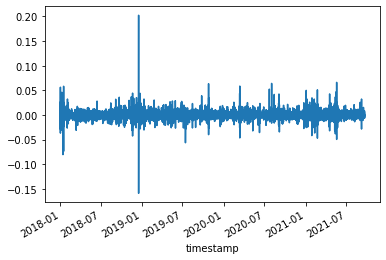

In [31]:
uni_data_df.plot()

<AxesSubplot:xlabel='timestamp'>

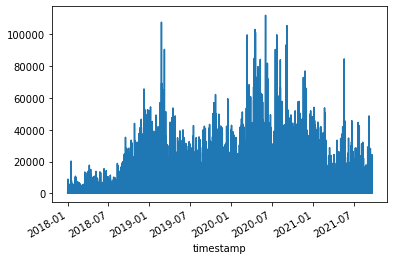

In [36]:
#the plot of the volume feature
uni_data_vol_df=final_df['Volume']
uni_data_vol_df.index = final_df['timestamp']
uni_data_vol_df.plot()

<AxesSubplot:xlabel='timestamp'>

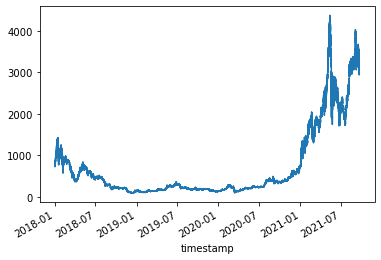

In [37]:
#the plot of the VWAP feature
uni_data_vwap_df=final_df['VWAP']
uni_data_vwap_df.index = final_df['timestamp']
uni_data_vwap_df.plot()

<AxesSubplot:xlabel='timestamp'>

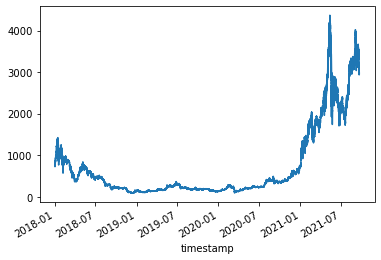

In [39]:
#the plot of the close feature
uni_data_close_df=final_df['Close']
uni_data_close_df.index = final_df['timestamp']
uni_data_close_df.plot()

<AxesSubplot:xlabel='timestamp'>

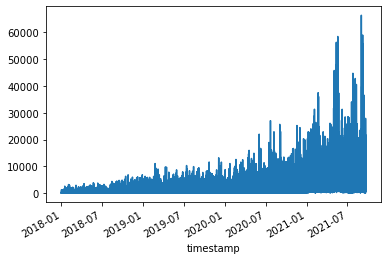

In [40]:
#the plot of the count feature
uni_data_count_df=final_df['Count']
uni_data_count_df.index = final_df['timestamp']
uni_data_count_df.plot()

In [43]:
correlations = final_df.corr() #pearson correlation
print(correlations)

                  Asset_ID     Count      Open      High       Low     Close  \
Asset_ID               NaN       NaN       NaN       NaN       NaN       NaN   
Count                  NaN  1.000000  0.518446  0.519337  0.517412  0.518408   
Open                   NaN  0.518446  1.000000  0.999995  0.999993  0.999998   
High                   NaN  0.519337  0.999995  1.000000  0.999980  0.999995   
Low                    NaN  0.517412  0.999993  0.999980  1.000000  0.999993   
Close                  NaN  0.518408  0.999998  0.999995  0.999993  1.000000   
Volume                 NaN  0.653442  0.057704  0.058306  0.056968  0.057654   
VWAP                   NaN  0.518396  0.999999  0.999996  0.999993  0.999999   
Target                 NaN  0.015767  0.001080  0.001090  0.001018  0.001060   
Target_recreated       NaN  0.015779  0.001087  0.001097  0.001026  0.001067   
Final_Target           NaN  0.015892  0.001226  0.001237  0.001165  0.001207   

                    Volume      VWAP   

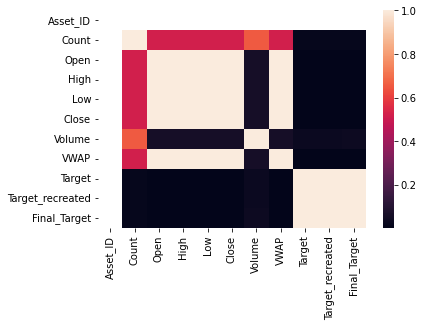

In [44]:
%matplotlib inline

sns.heatmap(correlations)
plt.show()